# Exercícios para entrega (Prova)

## Questão 4

$p(x|\omega_{1}) \backsim \mathcal{N}(7, 1)$

$p(x|\omega_{2}) \backsim \mathcal{N}(10, 1)$

$P(\omega_{1}) = \frac{99}{100}$

$P(\omega_{2}) = \frac{1}{100}$

In [1]:
# Importação de módulos
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

np.random.seed(100)

In [2]:
# Delimitação de dimensões para as figuras
X_MIN = 2
X_MAX = 16
N_PONTOS = 10000

$p(x | \omega_{i})$

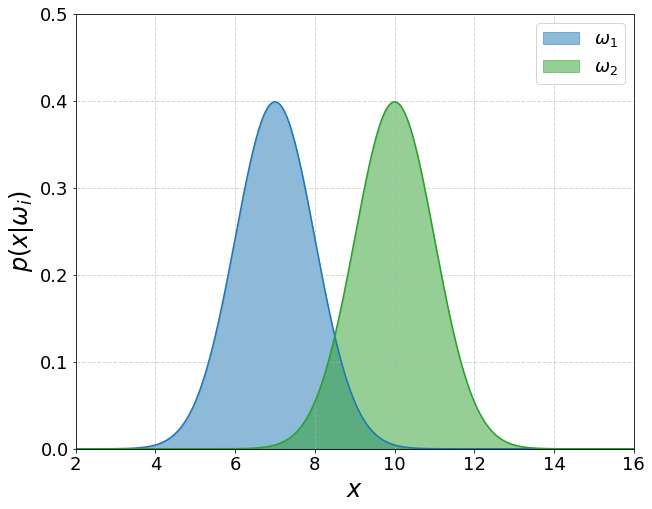

In [3]:
plt.figure(figsize=(10, 8))

# Para i=1
MEDIA = 7
DESVIO_PADRAO = 1

x = np.linspace(X_MIN, X_MAX, N_PONTOS)
y = norm.pdf(x, MEDIA, DESVIO_PADRAO)

plt.plot(x, y, color='C0')
plt.fill_between(x, y, color='C0', alpha=0.5, label=r'$\omega_1$')

# Para i=2
MEDIA = 10
DESVIO_PADRAO = 1

x = np.linspace(X_MIN, X_MAX, N_PONTOS)
y = norm.pdf(x, MEDIA, DESVIO_PADRAO)

plt.plot(x, y, color='C2')
plt.fill_between(x, y, color='C2', alpha=0.5, label=r'$\omega_2$')

plt.legend(fontsize=18)
plt.grid(True, linestyle='--', linewidth=1.0, alpha=0.5)

# Ajustes extras do plot
plt.xlim(X_MIN, X_MAX)
plt.ylim(0.0, 0.5)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r'$x$', fontsize=24)
plt.ylabel(r'$p(x | \omega_i)$', fontsize=24)

# Salvamento da figura em PDF
plt.savefig('ml_prova_04_a1.pdf',
            format='pdf',
            dpi=300,
            transparent=True,
            bbox_inches='tight')

# Exibicação 'limpa' da figura
plt.show()

$p(x | \omega_{i})\cdot P(\omega_{i})$

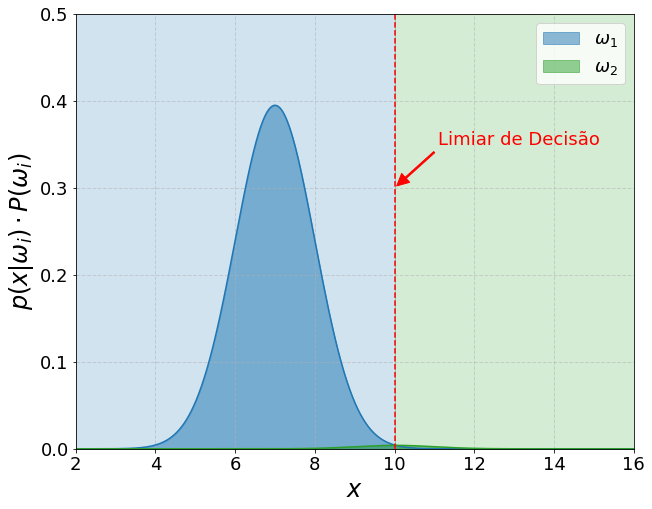

In [4]:
plt.figure(figsize=(10, 8))

# Para i=1
MEDIA = 7
DESVIO_PADRAO = 1

x = np.linspace(X_MIN, X_MAX, N_PONTOS)
y = 0.99 * norm.pdf(x, MEDIA, DESVIO_PADRAO)

plt.plot(x, y, color='C0')
plt.fill_between(x, y, color='C0', alpha=0.5, label=r'$\omega_1$')

# Para i=2
MEDIA = 10
DESVIO_PADRAO = 1

x = np.linspace(X_MIN, X_MAX, N_PONTOS)
y = 0.01 * norm.pdf(x, MEDIA, DESVIO_PADRAO)

plt.plot(x, y, color='C2')
plt.fill_between(x, y, color='C2', alpha=0.5, label=r'$\omega_2$')

plt.legend(fontsize=18)
plt.grid(True, linestyle='--', linewidth=1.0, alpha=0.5)

# Plot do limiar de decisão
plt.axvline(x=10, linestyle='--', color='red')
plt.annotate('Limiar de Decisão', 
             xy=(10, 0.3), 
             xytext=(11.1, 0.35), 
             arrowprops=dict(facecolor='red', 
                             shrink=0.05, 
                             width=1.5, 
                             edgecolor='red'), 
             color='red', 
             fontsize=18)

plt.axvspan(X_MIN, 10, alpha=0.2, color='C0')
plt.axvspan(10, X_MAX, alpha=0.2, color='C2')

# Ajustes extras do plot
plt.xlim(X_MIN, X_MAX)
plt.ylim(0.0, 0.5)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r'$x$', fontsize=24)
plt.ylabel(r'$p(x | \omega_i)\cdot P(\omega_i)$', fontsize=24)

# Salvamento da figura em PDF
plt.savefig('ml_prova_04_a2.pdf',
            format='pdf',
            dpi=300,
            transparent=True,
            bbox_inches='tight')

# Exibicação 'limpa' da figura
plt.show()

### Simulando a classificação de N=10000 novas amostras

In [5]:
# Geração de um conjunto de 500 amostras da classe omega_1 e 500 amostras da classe omega_2
amostras_omega1 = np.random.normal(7, 1, int(N_PONTOS * 99/100))
amostras_omega2 = np.random.normal(10, 1, int(N_PONTOS * 1/100))

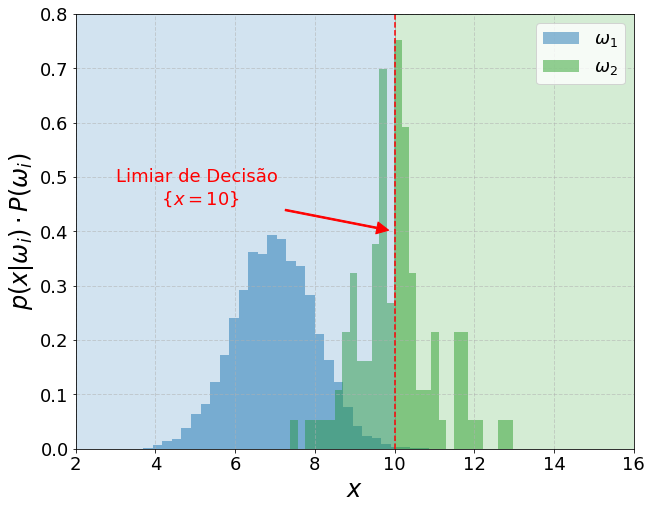

In [6]:
# Plot dos dados
plt.figure(figsize=(10, 8))

_, _, _ = plt.hist(amostras_omega1, 30, density=True, color='C0', alpha=0.5, label=r'$\omega_1$')
_, _, _ = plt.hist(amostras_omega2, 30, density=True, color='C2', alpha=0.5, label=r'$\omega_2$')

plt.legend(fontsize=18)
plt.grid(True, linestyle='--', linewidth=1.0, alpha=0.5)

# Plot do limiar de decisão
plt.axvline(x=10, linestyle='--', color='red')
plt.annotate('Limiar de Decisão\n\t$\{x=10\}$', 
             xy=(10, 0.4), 
             xytext=(3, 0.45), 
             arrowprops=dict(facecolor='red', 
                             shrink=0.05, 
                             width=1.5, 
                             edgecolor='red'), 
             color='red', 
             fontsize=18)

plt.axvspan(X_MIN, 10, alpha=0.2, color='C0')
plt.axvspan(10, X_MAX, alpha=0.2, color='C2')

# Ajustes extras do plot
plt.xlim(X_MIN, X_MAX)
plt.ylim(0.0, 0.8)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r'$x$', fontsize=24)
plt.ylabel(r'$p(x | \omega_i)\cdot P(\omega_i)$', fontsize=24)

# Salvamento da figura em PDF
plt.savefig('ml_prova_04_simulacao_10000_amostras.pdf',
            format='pdf',
            dpi=300,
            transparent=True,
            bbox_inches='tight')

# Exibicação 'limpa' da figura
plt.show()

In [7]:
# Função que classifica uma amostra segundo um dado limiar
def classificar(amostra, limiar):
    if amostra < limiar:
        return 1
    else:
        return 2

In [8]:
# Função que classifica um conjunto de amostras de acordo com um dado limiar
def classificar_conjunto(amostras, limiar):
    return np.array([classificar(amostra, limiar) for amostra in amostras])

In [9]:
# Função que calcula a quantidade de erros de classificação e a taxa de erro de classificação
def erros(classes_preditas, classe_correta):
    n_erros = 0
    for amostra in classes_preditas:
        if amostra != classe_correta:
            n_erros += 1
    taxa_de_erros = n_erros/len(classes_preditas)
    return n_erros, taxa_de_erros

In [10]:
# Classificação de uma amostra de acordo com um dado limiar
pred_omega1 = classificar_conjunto(amostras_omega1, limiar=10)
pred_omega2 = classificar_conjunto(amostras_omega2, limiar=10)

In [11]:
# Cálculo das quantidades de erros de classificação e da taxas de erro de classificação para cada classe
erros_omega1 = erros(classes_preditas=pred_omega1, classe_correta=1)
print('Classe 1\n--------------------------------')
print('Erros de Classificação: \t%d de %d' % (erros_omega1[0], int(N_PONTOS * 99/100)))
print('Taxa de Erro de Classificação: \t%.4f' % erros_omega1[1])

erros_omega2 = erros(classes_preditas=pred_omega2, classe_correta=2)
print('\n\nClasse 2\n--------------------------------')
print('Erros de Classificação: \t%d de %d' % (erros_omega2[0], int(N_PONTOS * 1/100)))
print('Taxa de Erro de Classificação: \t%.4f' % erros_omega2[1])

Classe 1
--------------------------------
Erros de Classificação: 	17 de 9900
Taxa de Erro de Classificação: 	0.0017


Classe 2
--------------------------------
Erros de Classificação: 	49 de 100
Taxa de Erro de Classificação: 	0.4900


In [12]:
# Cálculo da quantidade geral de erros de classificação e da taxa de erro de classificação
erros_gerais = (erros_omega1[0] + erros_omega2[0], 0.99 * erros_omega1[1] + 0.01 * erros_omega2[1])
print('Avaliação Geral do Classificador\n--------------------------------')
print('Erros de Classificação: \t%d de %d' % (erros_gerais[0], N_PONTOS))
print('Taxa de Erro de Classificação: \t%.4f' % erros_gerais[1])

Avaliação Geral do Classificador
--------------------------------
Erros de Classificação: 	66 de 10000
Taxa de Erro de Classificação: 	0.0066


In [13]:
# Preparação dos dados de forma mais conveniente para avaliação de desempenho
y_true = [1] * 9900
y_true.extend([2] * 100)
y_true = np.array(y_true)

y_pred = list(pred_omega1[:])
y_pred.extend(list(pred_omega2))
y_pred = np.array(y_pred)

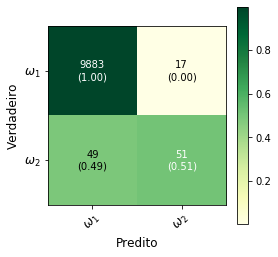

In [14]:
# Matriz de Confusão
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

CM = confusion_matrix(y_true, y_pred)
nomes_das_classes = [r'$\omega_{1}$', r'$\omega_{2}$']

plot_confusion_matrix(conf_mat=CM, 
                      show_absolute=True, 
                      show_normed=True, 
                      colorbar=True, 
                      class_names=nomes_das_classes, 
                      figsize=(4, 4), 
                      cmap='YlGn')

plt.xlabel('Predito', fontsize=12)
plt.ylabel('Verdadeiro', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('ml_prova_04_matriz_confusao.pdf', format='pdf', dpi=300, transparent=True, bbox_inches='tight')

plt.show()

In [15]:
# Avaliação de desempenho
from mlxtend.evaluate import scoring

erro = scoring(y_true, y_pred, metric='error')
acuracia = scoring(y_true, y_pred, metric='accuracy')
sensibilidade = scoring(y_true, y_pred, metric='sensitivity')
especificidade = scoring(y_true, y_pred, metric='specificity')

print('Verdadeiros Positivos: \t%d' % CM[1, 1])
print('Falsos Positivos: \t%d' % CM[0, 1])
print('Verdadeiros Negativos: \t%d' % CM[0, 0])
print('Falsos Negativos: \t%d' % CM[1, 0])

print('\n====================================\n')

print('Erro: \t\t%3.4f %%' % (erro * 100))
print('Acurácia: \t%3.4f %%' % (acuracia * 100))
print('Sensibilidade: \t%3.4f %%' % (sensibilidade * 100))
print('Especificidade: %3.4f %%' % (especificidade * 100))

Verdadeiros Positivos: 	51
Falsos Positivos: 	17
Verdadeiros Negativos: 	9883
Falsos Negativos: 	49


Erro: 		0.6600 %
Acurácia: 	99.3400 %
Sensibilidade: 	99.8283 %
Especificidade: 51.0000 %
